<a href="https://colab.research.google.com/github/valizcanos/ProcesosUnitarios/blob/main/osmosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

$\pi = P = -(\sigma_{c} R T)/V$<br>
# Π representa la presión osmótica inversa (en pascales).<br>
σc es el coeficiente de reflexión, que indica la eficiencia de la membrana en la retención de solutos. Toma valores entre 0 y 1, donde 0 indica una membrana perfecta que permite el paso completo del solvente y 1 indica una membrana perfecta que no permite el paso de los solutos.<br>
R es la constante de los gases ideales (8.314 J/(mol·K)).<br>
T es la temperatura absoluta en kelvin.<br>
V es el volumen molar parcial del solvente (en metros cúbicos por mol).

In [ ]:
R = 0.08205745 # L*atm/(mol*K) 
Temp = np.linspace(274,300,100)
efM = np.linspace(0.1,1,5)

In [ ]:
def presionesO(eficiencia,consR, Temperaturas, volumen):
  for i in range(5):
    P  = -(eficiencia[i]*consR*Temperaturas)/volumen
    plt.plot(Temperaturas, P, label=eficiencia[i])
    plt.xlabel("K")
    plt.ylabel("atm")
    plt.legend(title="eficiencias")

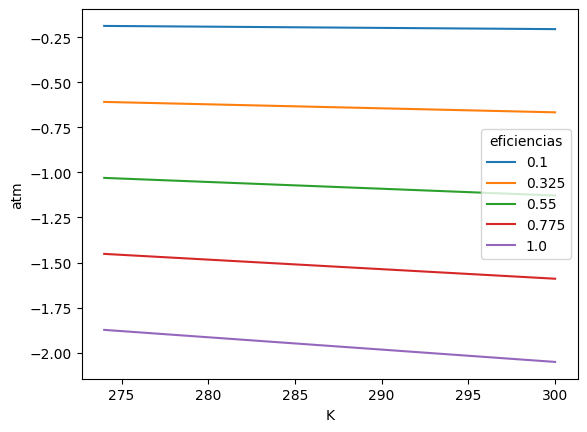

In [ ]:
presionesO(efM,R,Temp,12)

In [ ]:
# Parámetros del sistema
A = 0.1 # Área de la membrana en m2
Cf = 1000 # Concentración de sales en el alimento en ppm
Cp = 10 # Concentración de sales en el permeado en ppm
D = 1e-9 # Coeficiente de difusión en m2/s
L = 1e-6 # Grosor de la membrana en m
P = 10e5 # Presión aplicada en Pa
R = 8.314 # Constante de los gases ideales en J/mol*K
T = 298 # Temperatura en K
V = 0.1 # Volumen del tanque en m3

$\frac{dC_a}{dt} = \left[ \frac{P*A}{L*V}*(C_f - C_a) \right] - \left[ \frac{D*A}{L} * (C_a - C_v) \right] $

$\frac{dC_v}{dt} = \left[ \frac{D*A}{L} * (C_a - C_v) \right]$

$C_a$: Concentración de sales en el alimento en ppm <br>
$C_v$: Concentración de sales en el permeado en ppm <br>
$C_f$ = Concentración de sales en el alimento en ppm (final) <br>
$C_p$ =Concentración de sales en el permeado en ppm (final)

In [ ]:
# Función que describe el sistema
def sistema(y, t, A, Cf, Cp, D, L, P, R, T, V):
    Ca, Cv = y
    dCadt = (P*A/(L*V))*(Cf - Ca) - (D*A/L)*(Ca - Cv)
    dCvdt = (D*A/L)*(Ca - Cv)
    return [dCadt, dCvdt]

In [ ]:
# Condiciones iniciales
Ca0 = 0 # Concentración inicial de sales en el alimento en ppm
Cv0 = 0 # Concentración inicial de sales en el permeado en ppm
y0 = [Ca0, Cv0]

In [ ]:
y0

[0, 0]

In [ ]:
# Tiempo de simulación
t = np.linspace(0, 1000, 10000)

In [ ]:
# Simulación del sistema
sol = odeint(sistema, y0, t, args=(A, Cf, Cp, D, L, P, R, T, V))

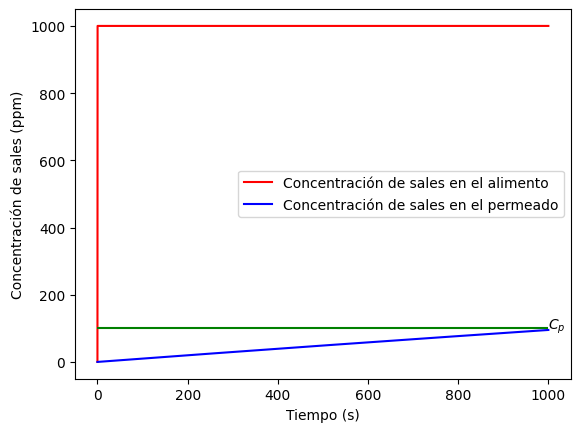

In [ ]:
# Gráfica de los resultados

plt.plot(t, sol[:, 0], 'r', label='Concentración de sales en el alimento')
plt.plot(t, sol[:, 1], 'b', label='Concentración de sales en el permeado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración de sales (ppm)')
plt.hlines(100,0,1000, colors="g")
plt.annotate("$C_p$",(1000,100))
plt.legend(loc='best')
plt.show()

In [ ]:
sol = odeint(sistema, y0, t, args=(A, Cf, Cp, D, L, P, R, T, V))

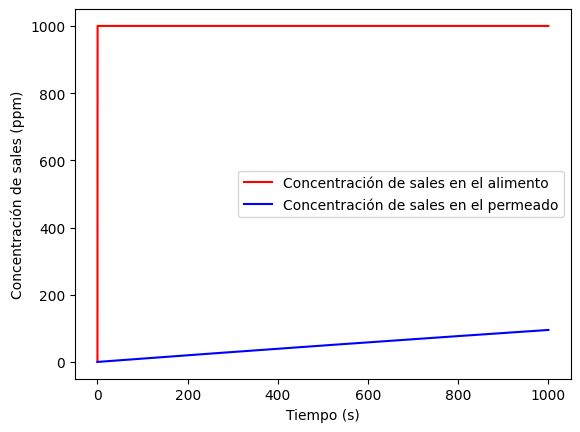

In [ ]:
# Gráfica de los resultados

plt.plot(t, sol[:, 0], 'r', label='Concentración de sales en el alimento')
plt.plot(t, sol[:, 1], 'b', label='Concentración de sales en el permeado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración de sales (ppm)')
plt.legend(loc='best')
plt.show()